In [1]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import re
import nltk

# Download stopwords (only the first time)
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Now load your CSV file (after importing pandas above)
spam = pd.read_csv("spam.csv", encoding='ISO-8859-1')
spam = spam[['v1', 'v2']]
spam.columns = ['label', 'message']
spam.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(spam)):
    review = re.sub('[^a-zA-Z]', ' ', spam['message'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    corpus.append(' '.join(review))


In [5]:
cv = CountVectorizer(max_features=4000)
X = cv.fit_transform(corpus).toarray()

# Target variable
Y = pd.get_dummies(spam['label'])
Y = Y.iloc[:, 1].values


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [7]:
# Random Forest
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

# Decision Tree
model2 = DecisionTreeClassifier()
model2.fit(X_train, Y_train)

# Naive Bayes
model3 = MultinomialNB()
model3.fit(X_train, Y_train)


MultinomialNB()

In [8]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, pred1))
print("Decision Tree Accuracy:", accuracy_score(Y_test, pred2))
print("Naive Bayes Accuracy:", accuracy_score(Y_test, pred3))


Random Forest Accuracy: 0.979372197309417
Decision Tree Accuracy: 0.9695067264573991
Naive Bayes Accuracy: 0.9802690582959641


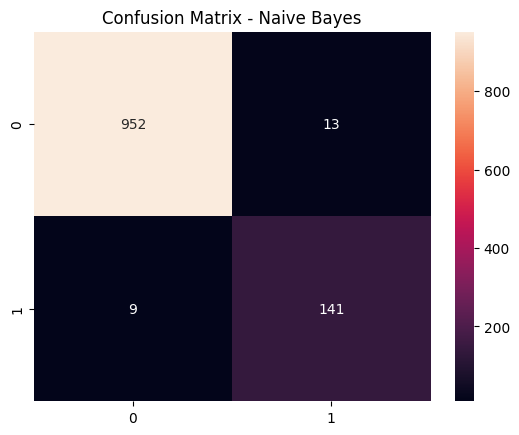

In [9]:
cm = confusion_matrix(Y_test, pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [10]:
print("RFC Report\n", classification_report(Y_test, pred1))
print("DTC Report\n", classification_report(Y_test, pred2))
print("MNB Report\n", classification_report(Y_test, pred3))


RFC Report
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       965
        True       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

DTC Report
               precision    recall  f1-score   support

       False       0.98      0.99      0.98       965
        True       0.93      0.84      0.88       150

    accuracy                           0.97      1115
   macro avg       0.95      0.91      0.93      1115
weighted avg       0.97      0.97      0.97      1115

MNB Report
               precision    recall  f1-score   support

       False       0.99      0.99      0.99       965
        True       0.92      0.94      0.93       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98     

In [11]:
pickle.dump(model3, open("MNB.pkl", 'wb'))
print("Model Saved!")


Model Saved!


In [12]:
def predict_spam(message):
    cleaned = re.sub('[^a-zA-Z]', ' ', message).lower()
    cleaned = [ps.stem(word) for word in cleaned.split() if word not in stopwords.words('english')]
    final_message = ' '.join(cleaned)
    vector = cv.transform([final_message]).toarray()
    result = model3.predict(vector)
    return "Spam" if result[0] == 1 else "Not Spam"

print(predict_spam("Congratulations! You have won a free iPhone. Click here!"))


Spam


In [13]:
print(predict_spam("Congratulations! You have won a free iPhone. Click here to claim it!"))  # Should return: Spam
print(predict_spam("Hey, can we reschedule our meeting for tomorrow?"))  # Should return: Not Spam


Spam
Not Spam


In [14]:
from google.colab import files
files.download("MNB.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>